In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.ticker as ticker
import matplotlib.colors
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns
import scipy
from pathlib import Path
__path = Path().absolute()
__rawdata_folder_path = __path / "data"

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


In [2]:
## UZH color definition
uzh_colors_full_not_colorsorted = [  
                [0.0, 0.156862745098, 0.647058823529, 1],
                [0.639215686, 0.67843137254902, 0.717647058823529, 1],
                [0.862745098039216, 0.376470588, 0.152941176470588, 1],
                [0.0431372549019608, 0.509803921568627, 0.627450980392157, 1],
                [0.164705882352941, 0.498039215686275, 0.384313725490196, 1],
                [0.568627450980392, 0.764705882352941, 0.290196078431373, 1],
                [0.996078431372549, 0.870588235294118, 0, 1],
                [0.0, 0.156862745098, 0.647058823529, 0.8],
                [0.639215686, 0.67843137254902, 0.717647058823529, 0.8],
                [0.862745098039216, 0.376470588, 0.152941176470588, 0.8],
                [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.8],
                [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.8],
                [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.8],
                [0.996078431372549, 0.870588235294118, 0, 0.8],
                [0.0, 0.156862745098, 0.647058823529, 0.6],
                [0.639215686, 0.67843137254902, 0.717647058823529, 0.6],
                [0.862745098039216, 0.376470588, 0.152941176470588, 0.6],
                [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.6],
                [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.6],
                [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.6],
                [0.996078431372549, 0.870588235294118, 0, 0.6],
                [0.0, 0.156862745098, 0.647058823529, 0.4],
                [0.639215686, 0.67843137254902, 0.717647058823529, 0.4],
                [0.862745098039216, 0.376470588, 0.152941176470588, 0.4],
                [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.4],
                [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.4],
                [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.4],
                [0.996078431372549, 0.870588235294118, 0, 0.4],
                [0.0, 0.156862745098, 0.647058823529, 0.2],
                [0.639215686, 0.67843137254902, 0.717647058823529, 0.2],
                [0.862745098039216, 0.376470588, 0.152941176470588, 0.2],
                [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.2],
                [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.2],
                [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.2],
                [0.996078431372549, 0.870588235294118, 0, 0.2]]

uzh_colors_full_colorsorted = [  
                [0.0, 0.156862745098, 0.647058823529, 1],
                [0.0, 0.156862745098, 0.647058823529, 0.8],
                [0.0, 0.156862745098, 0.647058823529, 0.6],
                [0.0, 0.156862745098, 0.647058823529, 0.4],
                [0.0, 0.156862745098, 0.647058823529, 0.2],

                [0.639215686, 0.67843137254902, 0.717647058823529, 1],
                [0.639215686, 0.67843137254902, 0.717647058823529, 0.8],
                [0.639215686, 0.67843137254902, 0.717647058823529, 0.6],
                [0.639215686, 0.67843137254902, 0.717647058823529, 0.4],
                [0.639215686, 0.67843137254902, 0.717647058823529, 0.2],

                [0.862745098039216, 0.376470588, 0.152941176470588, 1],
                [0.862745098039216, 0.376470588, 0.152941176470588, 0.8],
                [0.862745098039216, 0.376470588, 0.152941176470588, 0.6],
                [0.862745098039216, 0.376470588, 0.152941176470588, 0.4],
                [0.862745098039216, 0.376470588, 0.152941176470588, 0.2],

                [0.0431372549019608, 0.509803921568627, 0.627450980392157, 1],
                [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.8],
                [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.6],
                [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.4],
                [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.2],

                [0.164705882352941, 0.498039215686275, 0.384313725490196, 1],
                [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.8],
                [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.6],
                [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.4],
                [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.2],

                [0.568627450980392, 0.764705882352941, 0.290196078431373, 1],
                [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.8],
                [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.6],
                [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.4],
                [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.2],


                [0.996078431372549, 0.870588235294118, 0, 1],
                [0.996078431372549, 0.870588235294118, 0, 0.8],
                [0.996078431372549, 0.870588235294118, 0, 0.6],
                [0.996078431372549, 0.870588235294118, 0, 0.4],
                [0.996078431372549, 0.870588235294118, 0, 0.2]]

uzh_colors_no_shades = [  
                [0.0, 0.156862745098, 0.647058823529, 1],
                [0.639215686, 0.67843137254902, 0.717647058823529, 1],
                [0.862745098039216, 0.376470588, 0.152941176470588, 1],
                [0.0431372549019608, 0.509803921568627, 0.627450980392157, 1],
                [0.164705882352941, 0.498039215686275, 0.384313725490196, 1],
                [0.568627450980392, 0.764705882352941, 0.290196078431373, 1],
                [0.996078431372549, 0.870588235294118, 0, 1]]

uzh_colors_blue_orange = [  
                [0.639215686, 0.67843137254902, 0.717647058823529, 1],
                [0.639215686, 0.67843137254902, 0.717647058823529, 0.8],
                
                [0.0, 0.156862745098, 0.647058823529, 1],
                [0.0, 0.156862745098, 0.647058823529, 0.8],

                [0.862745098039216, 0.376470588, 0.152941176470588, 1],
                [0.862745098039216, 0.376470588, 0.152941176470588, 0.8]]

                
# UZH colormap generation
uzh_colors_full_not_colorsorted_colormap = ListedColormap(uzh_colors_full_not_colorsorted)
uzh_colors_full_colorsorted_colormap = ListedColormap(uzh_colors_full_colorsorted)
uzh_colors_no_shades_colormap = ListedColormap(uzh_colors_no_shades)
uzh_colors_blue_orange_colormap = ListedColormap(uzh_colors_blue_orange)

def reduced_colormap(colormap, number_of_colors_needed):

    reduced_cm = colormap(range(0,number_of_colors_needed))
    return(ListedColormap(reduced_cm))


In [3]:
def source_rawdata(rawdata_folder_path):

    dataset_pd = pd.DataFrame()

    for data_file in os.listdir(rawdata_folder_path):
        __filepath = rawdata_folder_path / data_file
        #Manually fixed the entry of line 10153 in file 2 as it contained additional /" characters causing import issues
        dataset_pd = pd.concat([dataset_pd,pd.read_table(__filepath, quotechar = '"', verbose = False)])
        
    return dataset_pd


imported_dataset_df = source_rawdata(__rawdata_folder_path)

In [4]:
pd.options.display.float_format = "{:.0f}".format
imported_dataset_df.info()
print('Number of duplicated rows: ', imported_dataset_df[imported_dataset_df.duplicated()].shape[0])
imported_dataset_df.describe().T


<class 'pandas.core.frame.DataFrame'>
Int64Index: 396030 entries, 0 to 99003
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   emp_title             373103 non-null  object 
 5   emp_length            377729 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  title                 394275 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  o

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030,14114,8357,500,8000,12000,20000,40000
int_rate,396030,14,4,5,10,13,16,31
installment,396030,432,251,16,250,375,567,1534
annual_inc,396030,74203,61638,0,45000,64000,90000,8706582
dti,396030,17,18,0,11,17,23,9999
open_acc,396030,11,5,0,8,10,14,90
pub_rec,396030,0,1,0,0,0,0,86
revol_bal,396030,15845,20592,0,6025,11181,19620,1743266
revol_util,395754,54,24,0,36,55,73,892
total_acc,396030,25,12,2,17,24,32,151


# 1. Exploratory data analysis

## 1.1 Attribute description

|Attribute|Description|
|---|---|
|loan_amnt             |The listed amount of the loan applied for by the borrower   |
|term                  |The number of payments on the loan. Values are in months and can be either 36 or 60.   |
|int_rate              |Interest Rate on the loan   |
|installment           |The monthly payment owed by the borrower if the loan originates.   |
|emp_title             |The job title supplied by the Borrower when applying for the loan.   |
|emp_length            |Employment length.   |
|home_ownership        |The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER   |
|annual_inc            |The self-reported annual income provided by the borrower during registration   |
|verification_status   |Indicates if income was verified by LC, not verified, or if the income source was verified   |
|issue_d               |The month which the loan was funded   |
|loan_status           |Current status of the loan   |
|purpose               |A category provided by the borrower for the loan request   |
|title                 |The loan title provided by the borrower   |
|dti                   |A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self-reported monthly income   |
|earliest_cr_line      |The month the borrower’s earliest reported credit line was opened   |
|open_acc              |The number of open credit lines in the borrower’s credit file   |
|pub_rec               |Number of derogatory public records   |
|revol_bal             |Total credit revolving balance   |
|revol_util            |Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit   |
|total_acc             |The total number of credit lines currently in the borrower’s credit file   |
|initial_list_status   |The initial listing status of the loan. Possible values are – W, F   |
|application_type      |Indicates whether the loan is an individual application or a joint application with two co-borrowers   |
|mort_acc              |Number of mortgage accounts   |
|pub_rec_bankruptcies  |Number of public record bankruptcies   |
|address               |The address provided by the borrower in the loan application  |

## 1.2 Dataset characteristics

### 1.2.1 Overall dataset

* Dataset contains 396030 entries with 25 attributes each
* Dataset does not contain duplicates


sns.countplot(x='loan_status', data=df)


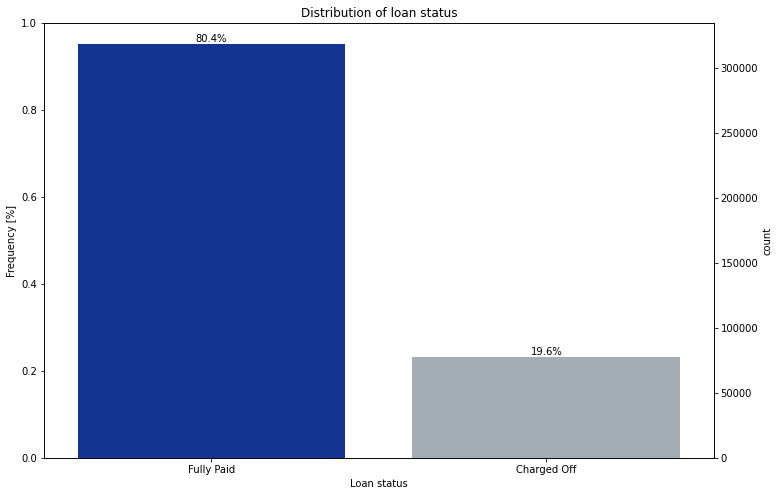

In [5]:
## Plot distribution for loan status

ncount = len(imported_dataset_df)

title = 'Distribution of loan status'

plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'loan_status', data = imported_dataset_df, palette = uzh_colors_no_shades)
plt.title(title)
plt.xlabel('Loan status')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text


plt.savefig('generated_graphs/' + title + '.png')

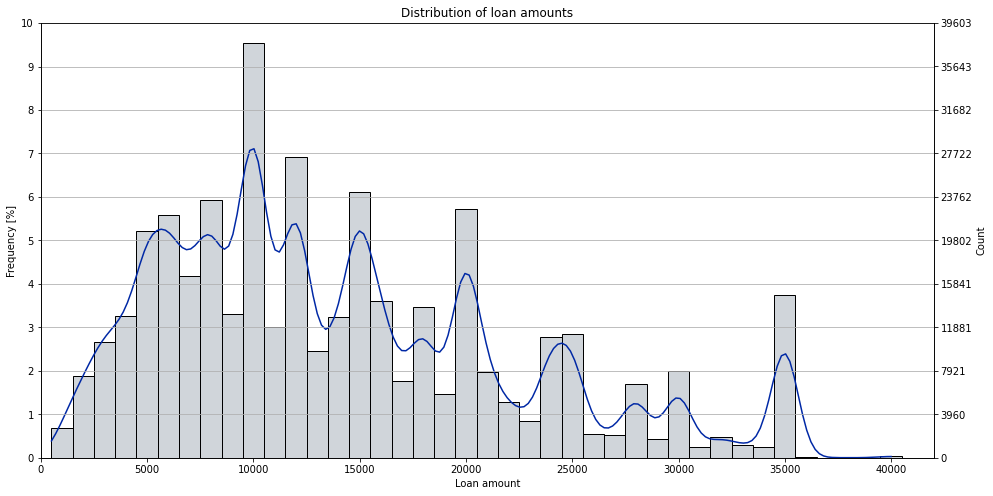

In [6]:
## Plot distribution for loan status
reduced_uzh_colormap = reduced_colormap(uzh_colors_no_shades_colormap,3)

title = 'Distribution of loan amounts'

ncount = len(imported_dataset_df)

plt.figure(figsize=(16,8))
ax = sns.histplot(data = imported_dataset_df['loan_amnt'], kde=True, binwidth = 1000, color = uzh_colors_blue_orange[0])
ax.lines[0].set_color(uzh_colors_blue_orange[2])
plt.title(title)
plt.xlabel('Loan amount')
plt.xlim(0,max(imported_dataset_df['loan_amnt']*1.05))

# Make twin axis
ax2=ax.twinx()


# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

# for p in ax.patches:
#     x=p.get_bbox().get_points()[:,0]
#     y=p.get_bbox().get_points()[1,1]
#     ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Gridlines left ticks
left_ticks = 1 


# Fix the frequency range to 0-100
ax2.set_ylim(0,100*ax.get_ylim()[1]/ncount)
ax.set_ylim(0,ncount/10)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(left_ticks))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid()


plt.savefig('generated_graphs/' + title + '.png')


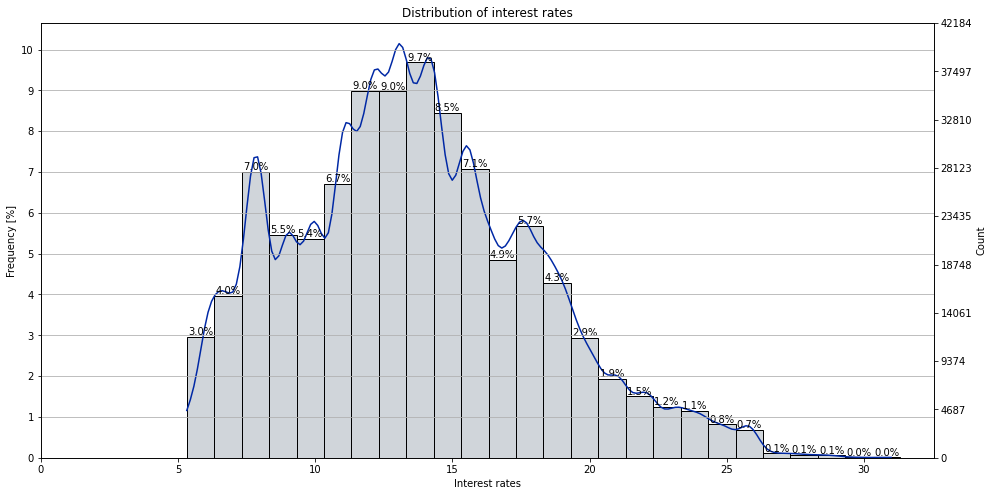

In [7]:
## Plot distribution for interest rates
ncount = len(imported_dataset_df)

title = 'Distribution of interest rates'

plt.figure(figsize=(16,8))
ax = sns.histplot(data = imported_dataset_df['int_rate'], kde = True, binwidth = 1, color = uzh_colors_blue_orange[0])
ax.lines[0].set_color(uzh_colors_blue_orange[2])
plt.title(title)
plt.xlabel('Interest rates')
plt.xlim(0,max(imported_dataset_df['int_rate']*1.05))

# Make twin axis
ax2 = ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(10))

# # # Gridlines left ticks
left_ticks = 1 

# # Fix the frequency range to 0-100
ax2.set_ylim(0,100*ax.get_ylim()[1]/ncount)


# # # And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(left_ticks))

# # # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid()

plt.savefig('generated_graphs/' + title + '.png')


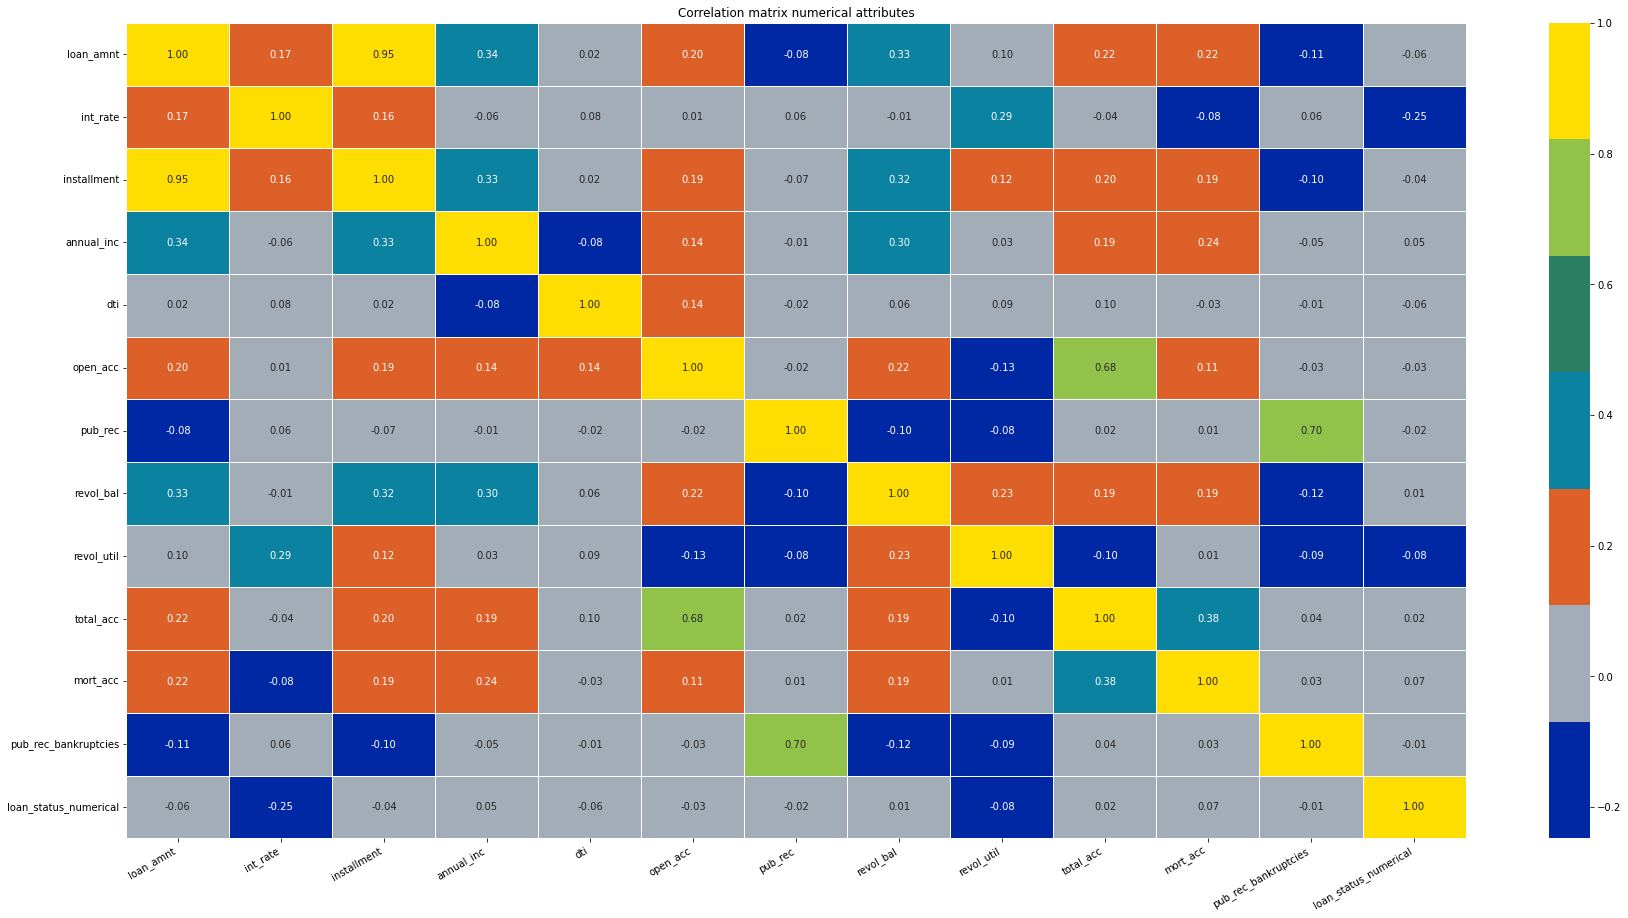

In [8]:
## Convert binary categorical attributes to numerical
imported_dataset_df['loan_status_numerical'] = imported_dataset_df['loan_status'].replace(['Fully Paid', 'Charged Off'], [1, 0], inplace = False)
imported_dataset_df['term_numerical'] = imported_dataset_df['term'].replace(['36', '60'], [36, 60], inplace = False)

## Correlation matrix
title = 'Correlation matrix numerical attributes'

corrmat = imported_dataset_df.corr()

reduced_map = reduced_colormap(uzh_colors_no_shades_colormap, 7)#.reversed()

plt.figure(figsize=(30, 15))
plt.title(title)

sns.heatmap(corrmat, vmax = 1, annot = True, linewidths = 0.5, cmap = reduced_map, fmt = '.2f')

plt.xticks(rotation = 30, horizontalalignment = 'right')

plt.savefig('generated_graphs/' + title + '.png')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

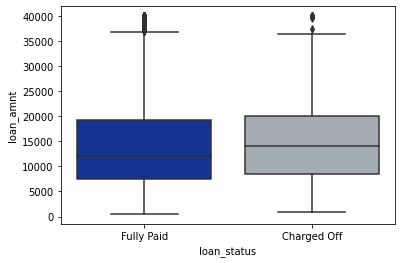

In [9]:
sns.boxplot(x='loan_status',y='loan_amnt',data=imported_dataset_df, palette = uzh_colors_no_shades)



<AxesSubplot:>

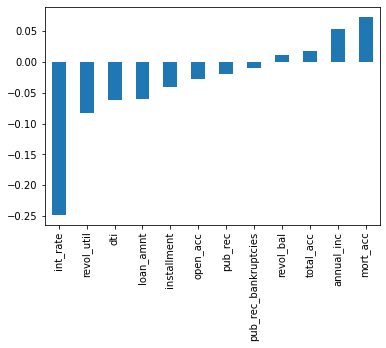

In [10]:
imported_dataset_df.corr()['loan_status_numerical'].sort_values().drop('loan_status_numerical').plot(kind='bar')

<AxesSubplot:xlabel='emp_length', ylabel='count'>

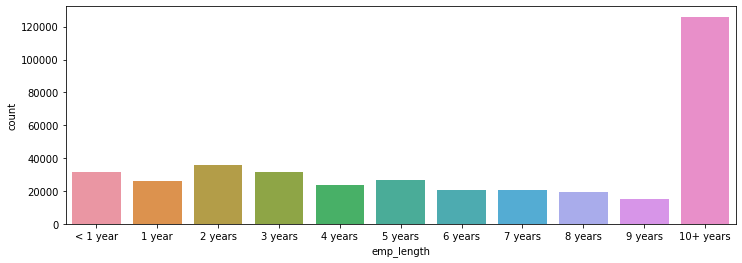

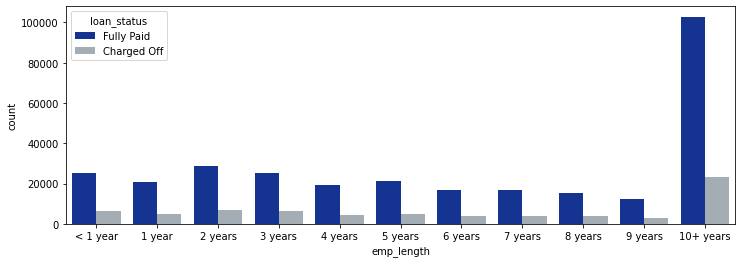

In [11]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']


plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=imported_dataset_df,order=emp_length_order)



plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=imported_dataset_df,order=emp_length_order,hue='loan_status', palette = uzh_colors_no_shades)



<AxesSubplot:xlabel='emp_length'>

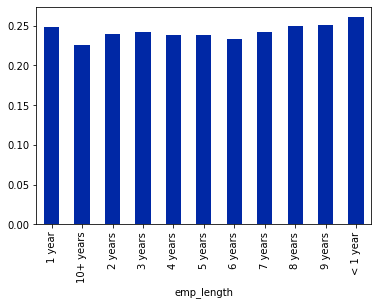

In [12]:
emp_co = imported_dataset_df[imported_dataset_df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = imported_dataset_df[imported_dataset_df['loan_status']== "Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp
emp_len.plot(kind='bar', color = uzh_colors_no_shades[0])

<AxesSubplot:ylabel='Frequency'>

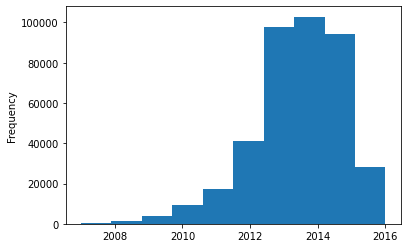

In [13]:
imported_dataset_df.term = imported_dataset_df.term.apply(str)
imported_dataset_df['term'] = imported_dataset_df['term'].apply(lambda x: x.strip().split(" ")[0])

imported_dataset_df.issue_d = pd.to_datetime(imported_dataset_df.issue_d)
imported_dataset_df['issue_yr'] = imported_dataset_df.issue_d.dt.year
imported_dataset_df['issue_yr'].plot.hist()



In [14]:
# Finds outliers for an individual column, outliers can be mild (1.5 * IQR) or extreme (3 * IQR)
def find_outliers_for_column(dataframe, column_name, outlier_type = 'mild'):

    outlier_list = []
    lower_quantile = dataframe[column_name].quantile(0.25)
    upper_quantile = dataframe[column_name].quantile(0.75)
    if outlier_type == 'mild':
        inter_quantile_range = (upper_quantile - lower_quantile)*1.5
    elif outlier_type == 'extreme':
        inter_quantile_range = (upper_quantile - lower_quantile)*3
    lower_limit = lower_quantile - inter_quantile_range
    upper_limit = upper_quantile + inter_quantile_range

    for datapoint in dataframe[column_name]:
        if datapoint > upper_limit or datapoint < lower_limit:
            outlier_list.append(datapoint)


    return (outlier_list)

In [15]:
# Save all initial numerical values
numerical_attributes_initial = imported_dataset_df.describe().columns

## Convert categorical to numerical values
# imported_dataset_df = pd.concat([imported_dataset_df, pd.get_dummies(imported_dataset_df['emp_length'], prefix = 'emp_len')], axis='columns')
# imported_dataset_df = pd.concat([imported_dataset_df, pd.get_dummies(imported_dataset_df['home_ownership'], prefix = 'home_ownership_')], axis='columns')
# imported_dataset_df = pd.concat([imported_dataset_df, pd.get_dummies(imported_dataset_df['verification_status'], prefix = 'verif_stat_')], axis='columns')
# imported_dataset_df = pd.concat([imported_dataset_df, pd.get_dummies(imported_dataset_df['purpose'], prefix = 'purpose_')], axis='columns')



In [16]:
numerical_attributes = imported_dataset_df.describe().columns

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


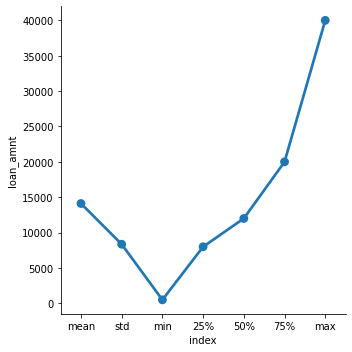

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


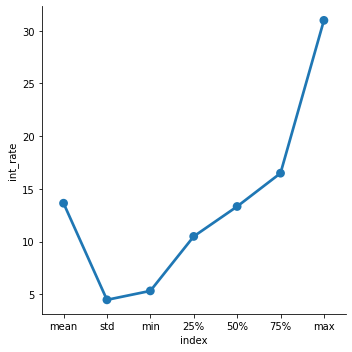

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


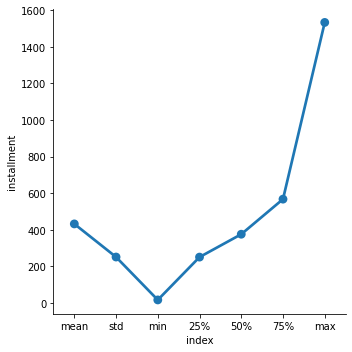

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


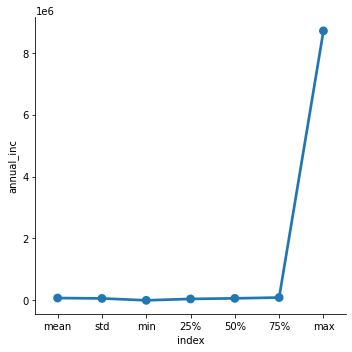

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


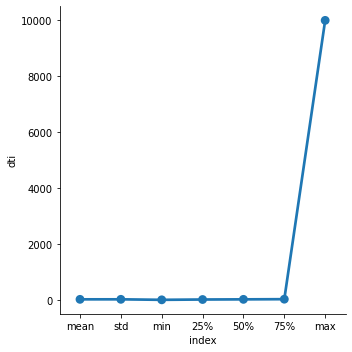

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


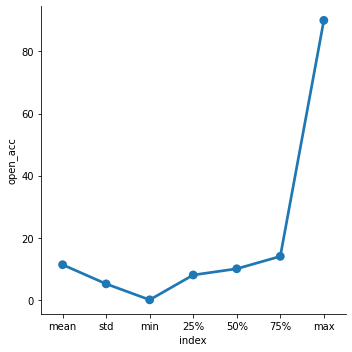

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


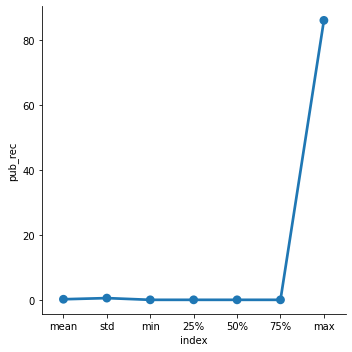

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


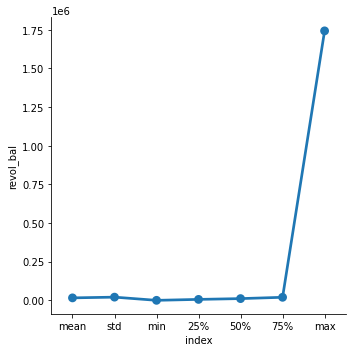

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


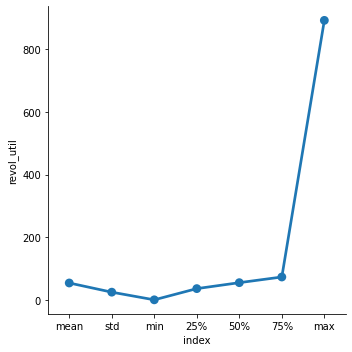

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


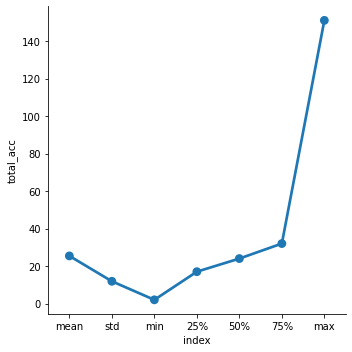

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


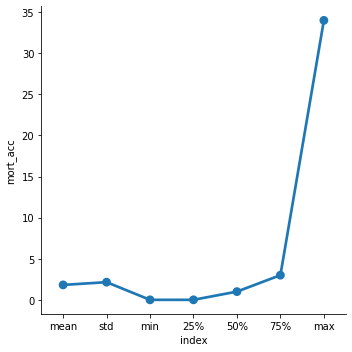

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


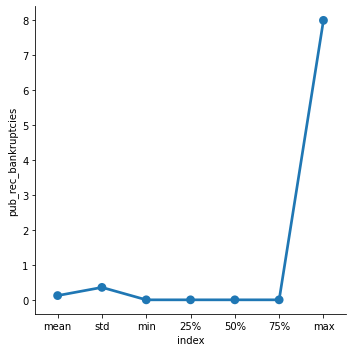

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


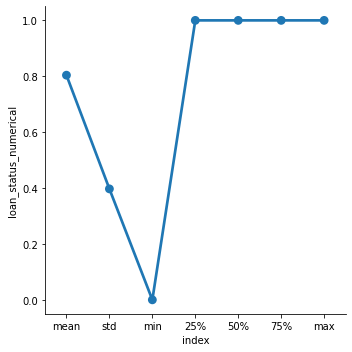

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


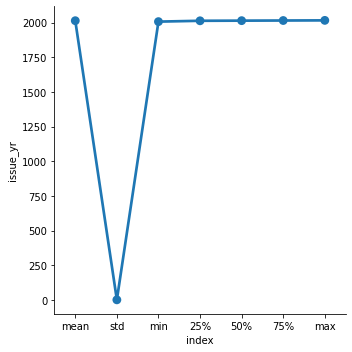

In [17]:
num_col = imported_dataset_df._get_numeric_data().columns

# remove all non numeric variables
describe_num_df = imported_dataset_df.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)


describe_num_df = describe_num_df[describe_num_df['index'] != 'count']

for i in num_col:  
    
    if i in ['index']:   
        continue  
    
    sns.factorplot(x='index', y=i, data=describe_num_df)
    
    plt.show()

                       count
loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_title              22927
emp_length             18301
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                   1755
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               276
total_acc                  0
initial_list_status        0
application_type           0
mort_acc               37795
pub_rec_bankruptcies     535
address                    0
loan_status_numerical      0
term_numerical             0
issue_yr                   0


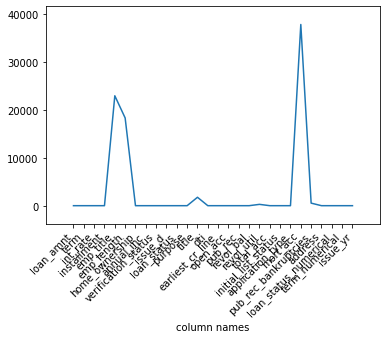

In [18]:
null_df = imported_dataset_df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_df)

plt.plot(null_df.index, null_df['count'])
plt.xticks(null_df.index, null_df.index, rotation=45,horizontalalignment='right')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [19]:
# total_columns = imported_dataset_df.columns
# cat_col = list(set(total_columns)-set(num_col))

# for i in cat_col: 
#     if i in ['source']:      
#         continue   
#     plt.figure(figsize=(10, 5))   
#     chart = sns.countplot(   
#         data=imported_dataset_df,  
#         x=i,  
#         palette=uzh_colors_full_not_colorsorted)  
    
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=45)   
#     plt.show()

In [20]:
fig = make_subplots(rows = 1, cols=len(numerical_attributes))

# Use x instead of y argument for horizontal plot
count_i = 0
for i in numerical_attributes:
    count_i += 1
    fig.add_trace(go.Box(y=imported_dataset_df[i], name = i), 
                            row = 1, col = count_i)  

#fig.show()

In [21]:
fig = make_subplots(rows = 1, cols=len(numerical_attributes))

# Use x instead of y argument for horizontal plot
count_i = 0
for i in numerical_attributes:
    count_i += 1
    fig.add_trace(go.Box(y=imported_dataset_df[i], name = i), 
                            row = 1, col = count_i)  

#fig.show()

In [22]:
# Group data together
hist_data = [imported_dataset_df[numerical_attributes[0]]]

group_labels = [numerical_attributes[0]]

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=[1000])
#fig.show()

fig.write_html(file = __path/'test.html')

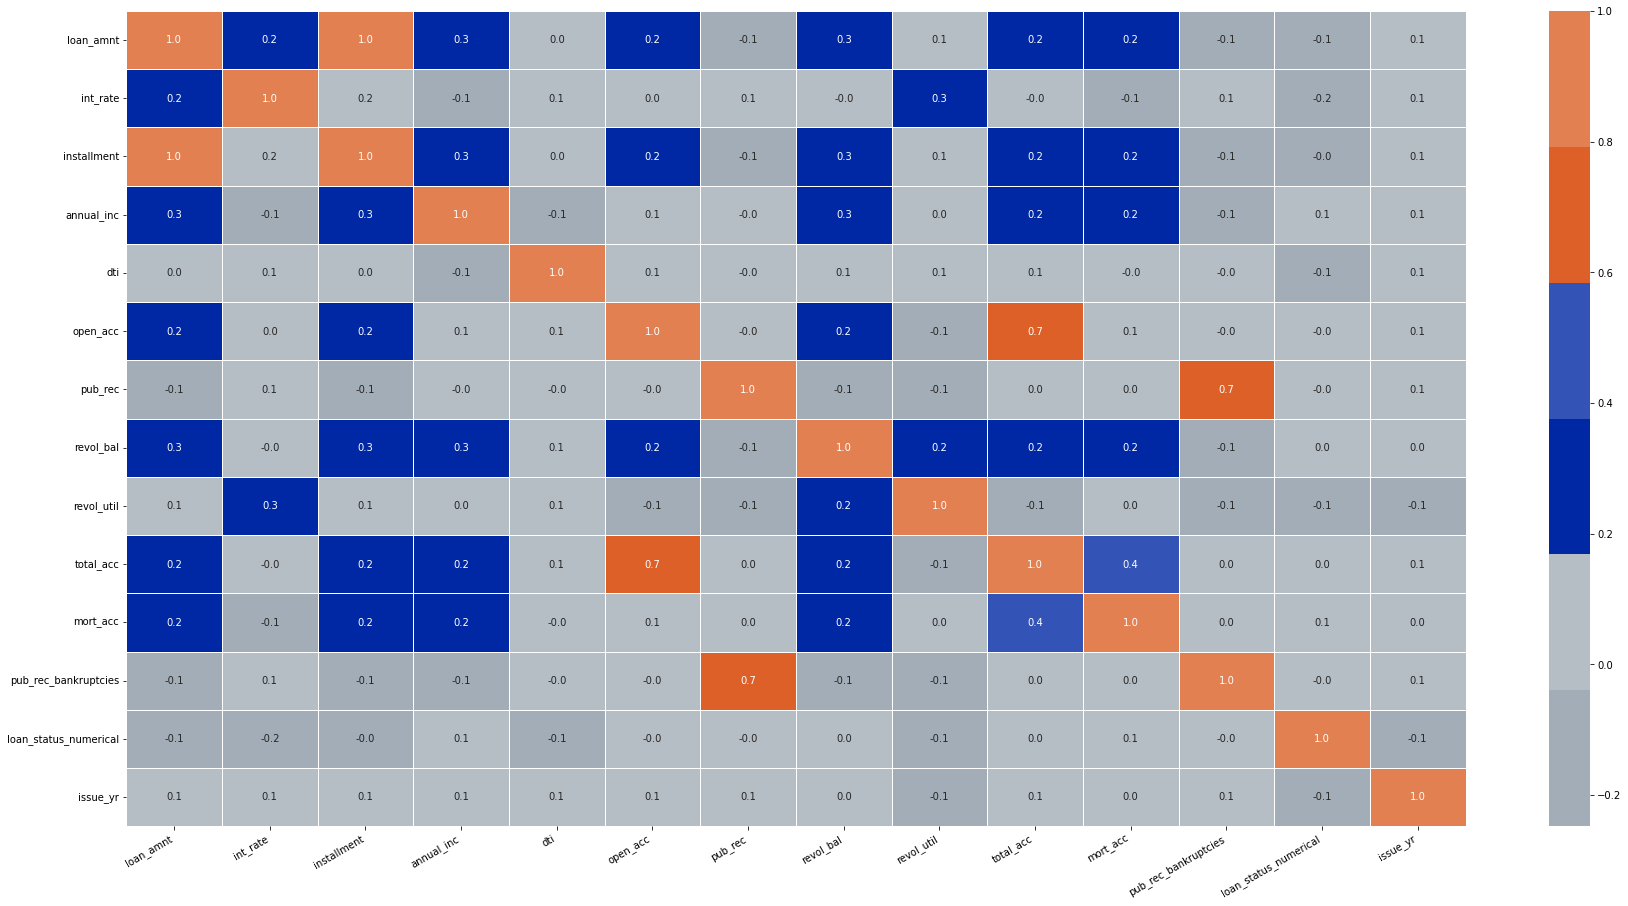

In [23]:
corrmat = imported_dataset_df.corr()

reduced_map = reduced_colormap(uzh_colors_blue_orange_colormap, 6)#.reversed()


plt.figure(figsize=(30, 15))

sns.heatmap(corrmat, vmax = 1, annot = True, linewidths = 0.5, cmap = reduced_map, fmt = '.1f')

plt.xticks(rotation = 30, horizontalalignment = 'right')

plt.show()

In [24]:
imported_dataset_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_status_numerical',
       'term_numerical', 'issue_yr'],
      dtype='object')

<AxesSubplot:xlabel='annual_inc', ylabel='loan_amnt'>

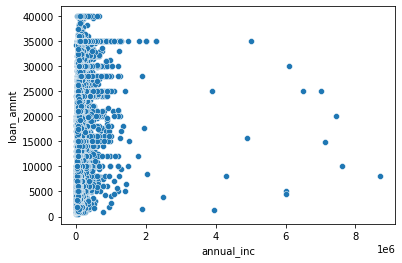

In [25]:
sns.scatterplot(x='annual_inc', y='loan_amnt', data=imported_dataset_df)


<AxesSubplot:>

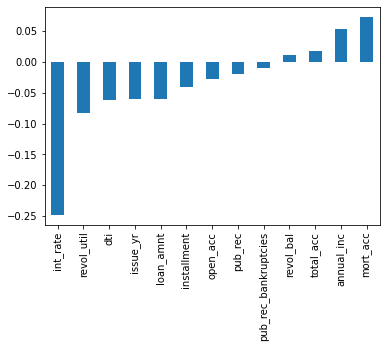

In [26]:
imported_dataset_df.corr()['loan_status_numerical'].sort_values().drop('loan_status_numerical').plot(kind='bar')

In [27]:
# Import scipy
from scipy.stats import boxcox
from scipy import stats

In [28]:
# Label encoding the two categories
imported_dataset_df['loan_status_numerical'].value_counts()


1    318357
0     77673
Name: loan_status_numerical, dtype: int64

C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



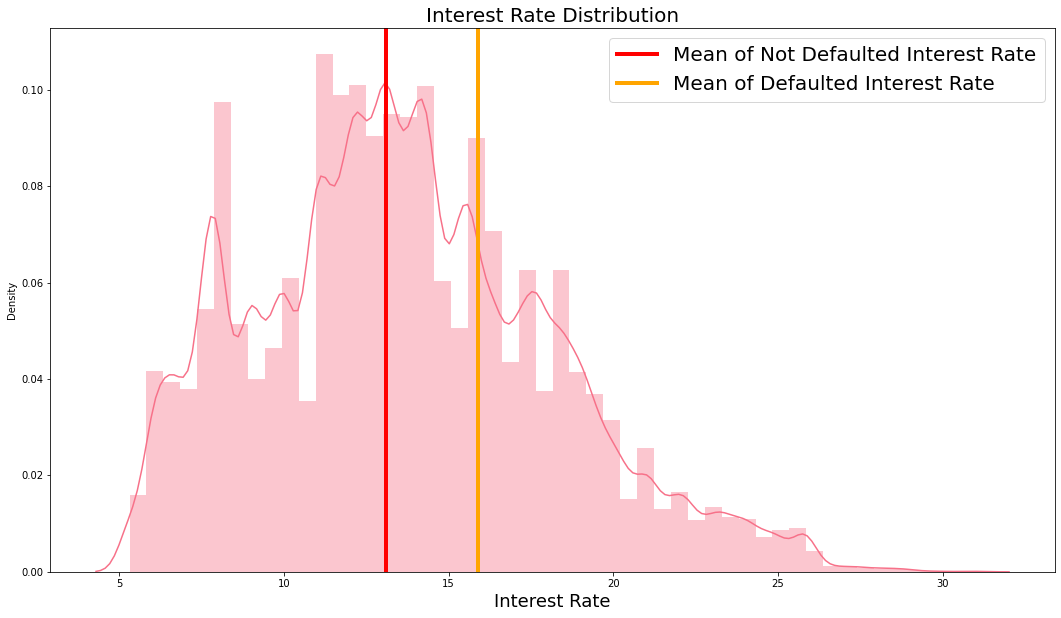

In [29]:
# Visualize the distribution of interest rates
df_defaulted = imported_dataset_df[imported_dataset_df['loan_status_numerical'] == 0]
df_not_defaulted = imported_dataset_df[imported_dataset_df['loan_status_numerical'] == 1]
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(imported_dataset_df['int_rate'], hist='density')
plt.axvline(x=df_not_defaulted.int_rate.mean(), color='red', linestyle='-', lw=4, label='Mean of Not Defaulted Interest Rate')
plt.axvline(x=df_defaulted.int_rate.mean(), color='orange', linestyle='-', lw=4, label='Mean of Defaulted Interest Rate')
plt.title('Interest Rate Distribution', fontsize=20)
plt.xlabel('Interest Rate', fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [30]:
print("The difference in mean between the two interest rates is:", round(df_defaulted.int_rate.mean() - df_not_defaulted.int_rate.mean(),2), '%')

The difference in mean between the two interest rates is: 2.79 %


C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



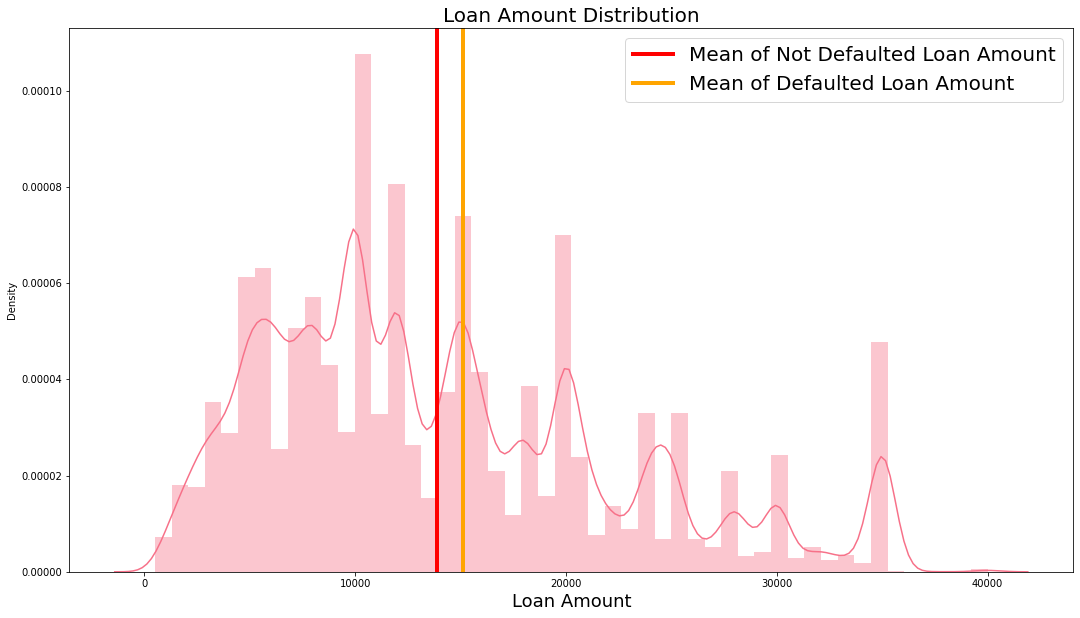

In [31]:
# Visualize the distribution of interest rates
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(imported_dataset_df['loan_amnt'], hist='density')
plt.axvline(x=df_not_defaulted.loan_amnt.mean(), color='red', linestyle='-', lw=4, label='Mean of Not Defaulted Loan Amount')
plt.axvline(x=df_defaulted.loan_amnt.mean(), color='orange', linestyle='-', lw=4, label='Mean of Defaulted Loan Amount')
plt.title('Loan Amount Distribution', fontsize=20)
plt.xlabel('Loan Amount', fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [32]:
print("The difference in mean between the two interest rates is:", int(df_defaulted.loan_amnt.mean() - df_not_defaulted.loan_amnt.mean()), 'USD')

The difference in mean between the two interest rates is: 1259 USD


C:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



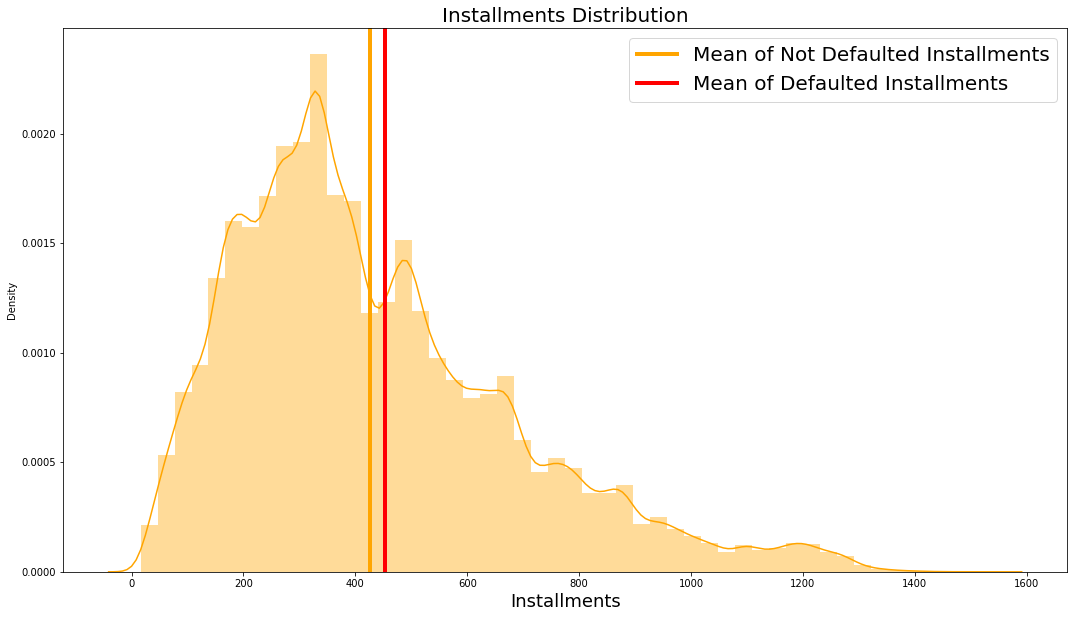

In [33]:
# Visualize the distribution of installments

sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(imported_dataset_df['installment'], hist='density', color='orange')
plt.axvline(x=df_not_defaulted.installment.mean(), color='orange', linestyle='-', lw=4, label='Mean of Not Defaulted Installments')
plt.axvline(x=df_defaulted.installment.mean(), color='red', linestyle='-', lw=4, label='Mean of Defaulted Installments')
plt.title('Installments Distribution', fontsize=20)
plt.xlabel('Installments', fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [34]:
print("The difference in mean between the two installment values is:", round(df_defaulted.installment.mean() - df_not_defaulted.installment.mean(),2))

The difference in mean between the two installment values is: 25.94


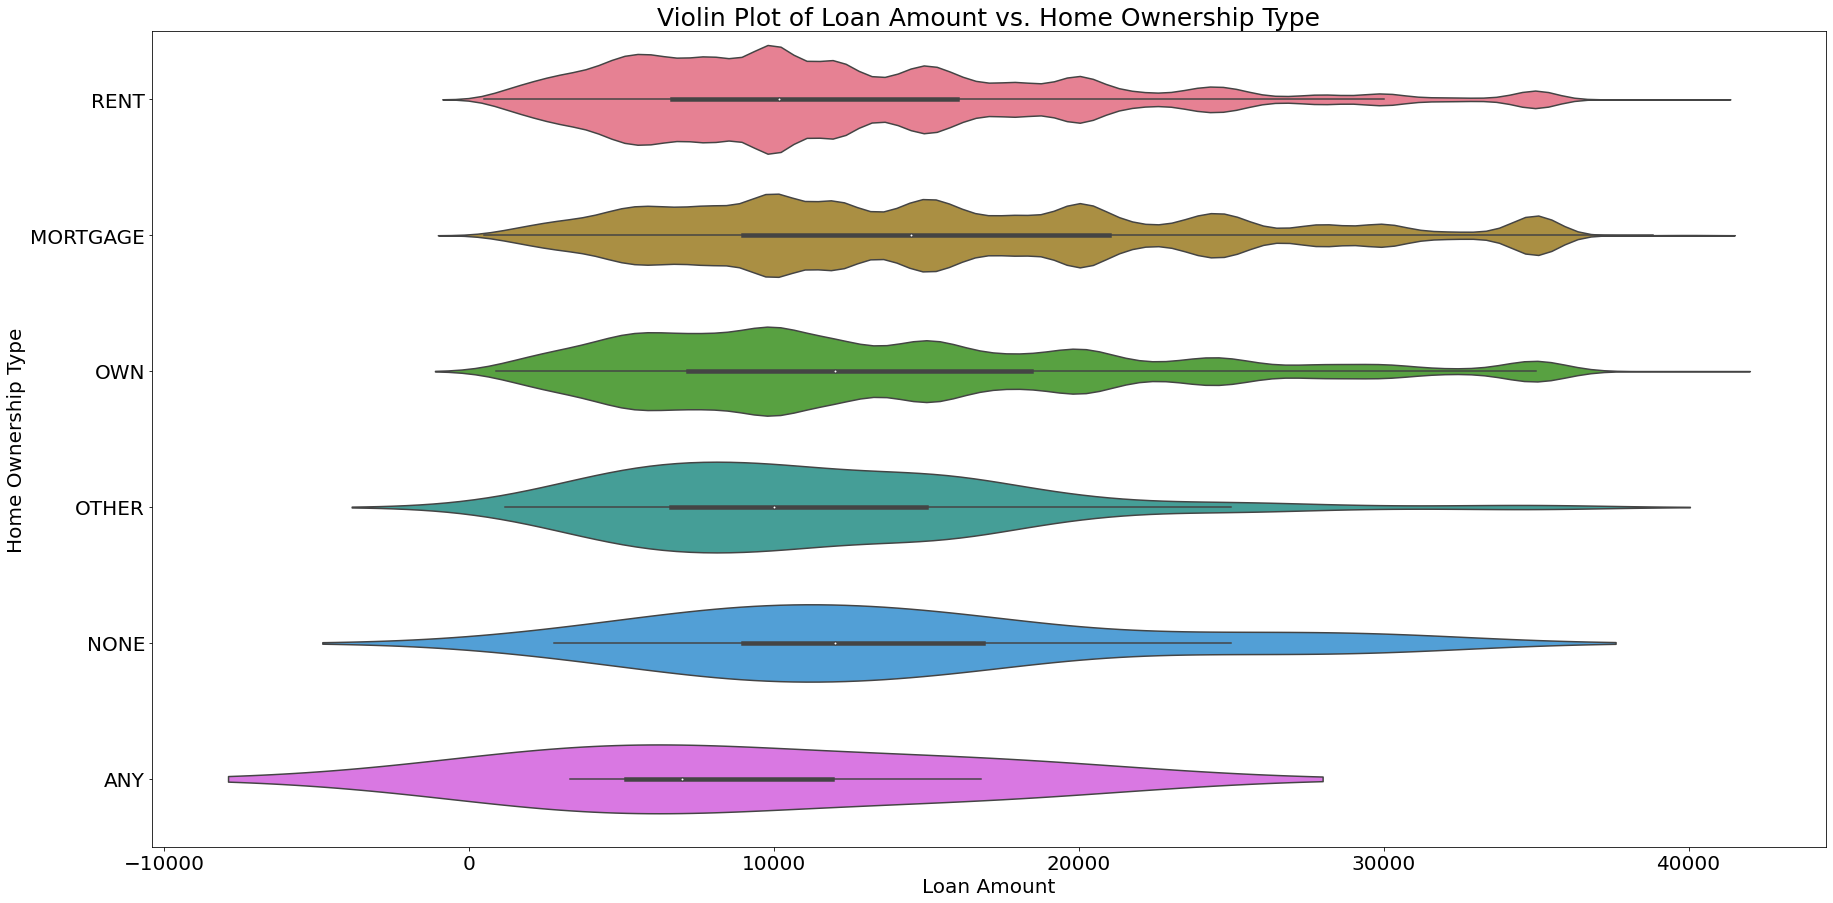

In [35]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,15))
sns.violinplot(x="loan_amnt", y="home_ownership", data=imported_dataset_df, palette="husl")
plt.title('Violin Plot of Loan Amount vs. Home Ownership Type', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Home Ownership Type', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()



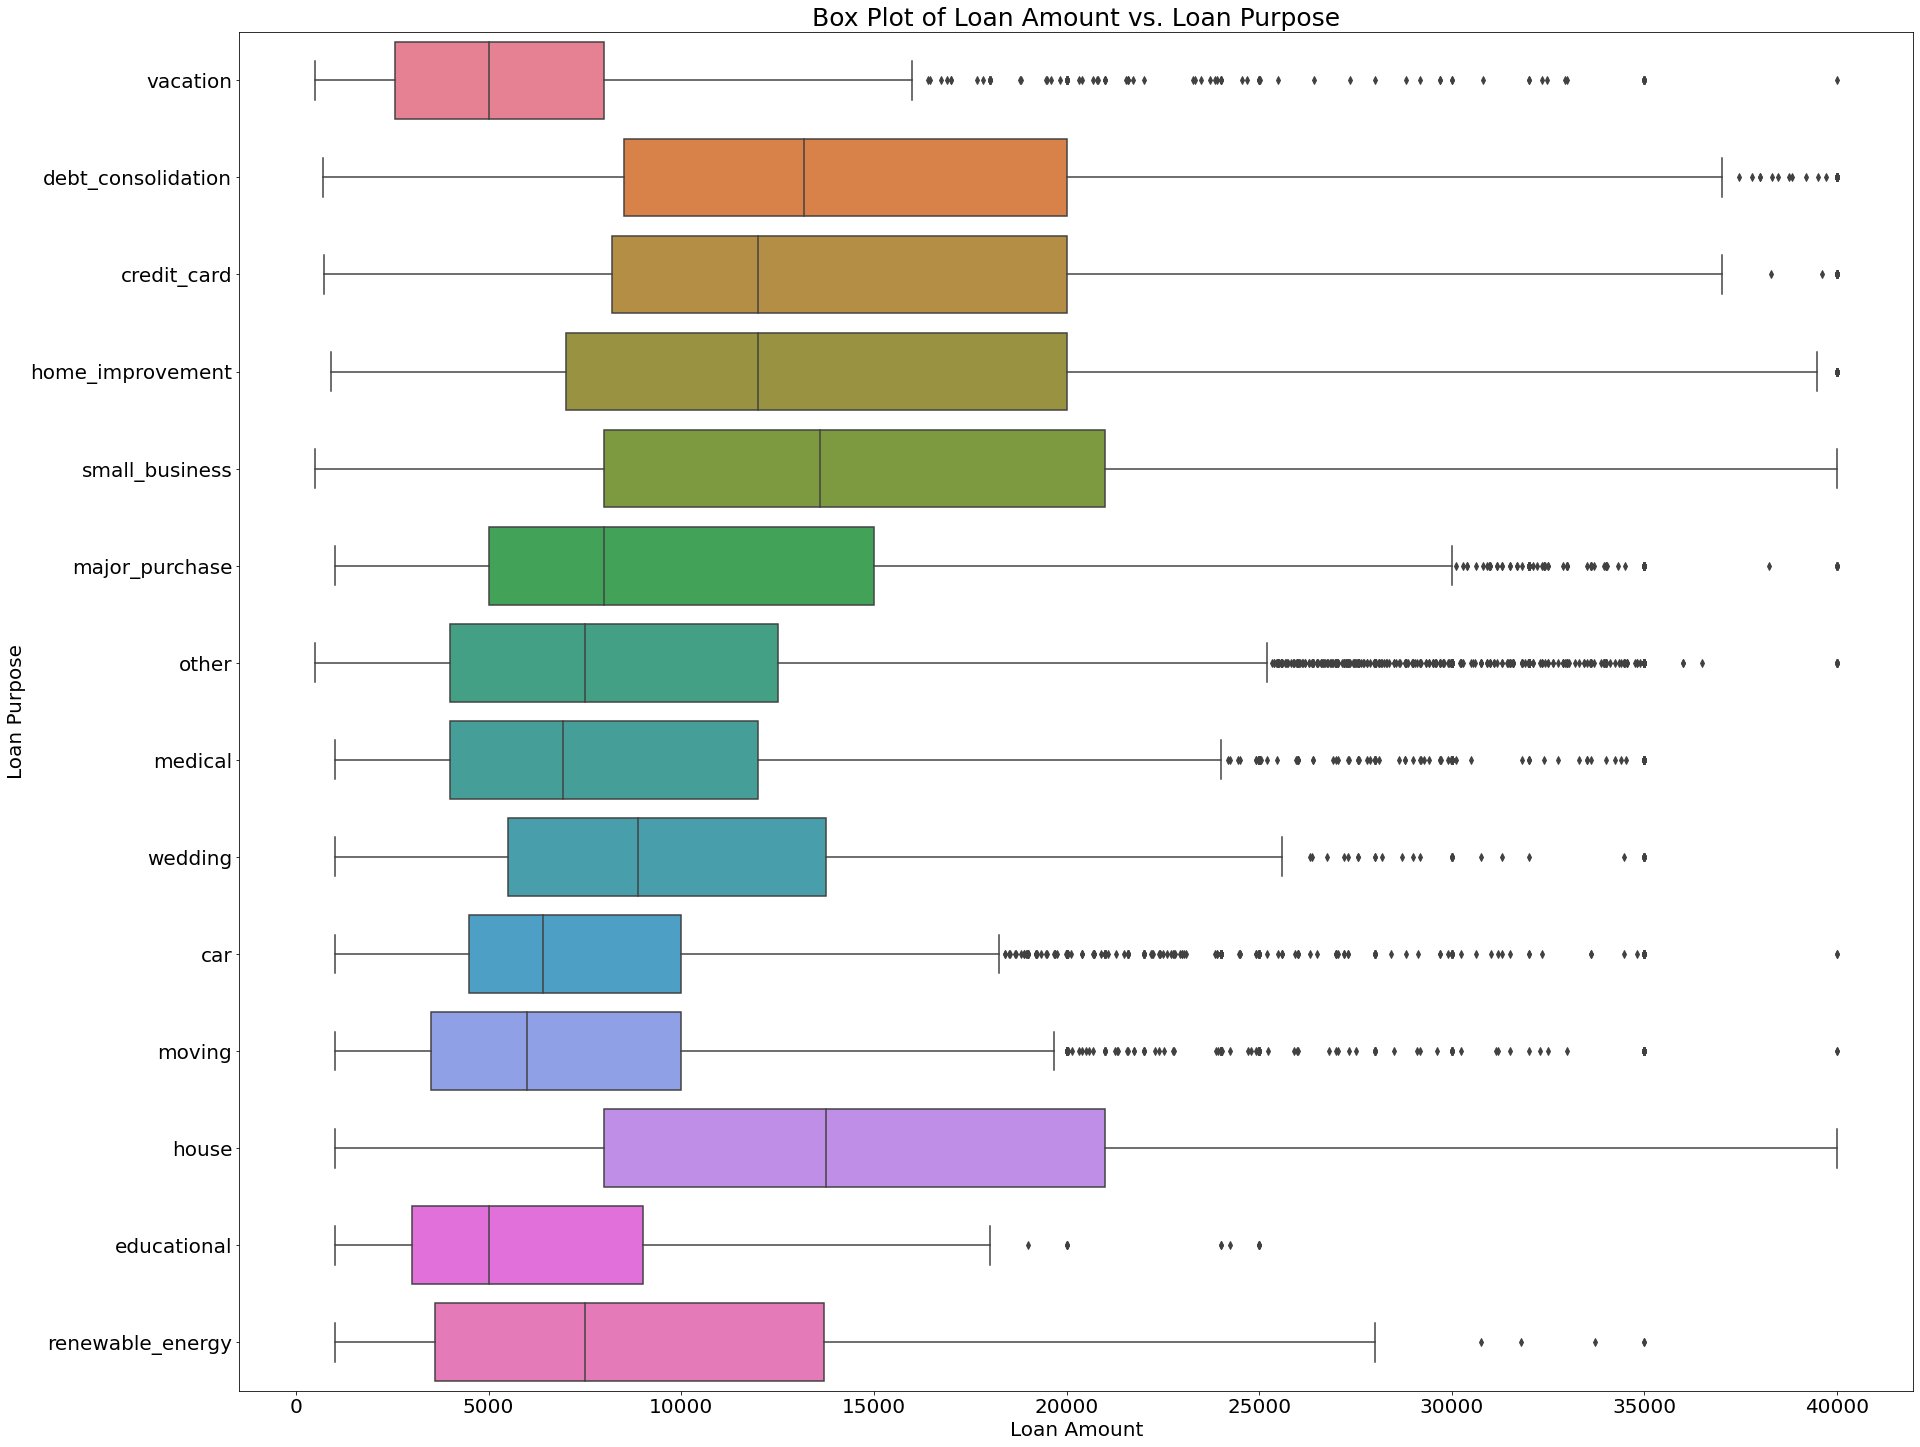

In [36]:
# Plot the borrower's Loan Amount compared to Loan Purpose
plt.figure(figsize=(30,25))
sns.boxplot(x="loan_amnt", y="purpose", data=imported_dataset_df, palette="husl")
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()



In [88]:
df_modeling_simple = imported_dataset_df.copy(deep=True)
# Label encoding the two categories
df_modeling_simple.loan_status=df_modeling_simple.loan_status.astype('category').cat.codes
df_modeling_simple.head()
df_modeling_simple['loan_status_numerical'].value_counts()
df_modeling_simple = df_modeling_simple.drop(columns= ['loan_status'])

In [89]:
# Writing a for-loop to shift the data towards normality
numerical = df_modeling_simple.columns[df_modeling_simple.dtypes == 'float64']
for i in numerical:
    if df_modeling_simple[i].min() > 0:
        transformed, lamb = boxcox(df_modeling_simple.loc[df_modeling_simple[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df_modeling_simple.loc[df_modeling_simple[i].notnull(), i] = transformed

In [90]:
# Retrieve datatypes
df_modeling_simple.dtypes

df_modeling_set = df_modeling_simple.copy(deep=True)
df_modeling_set = df_modeling_set.drop(columns = ['title','earliest_cr_line','address','term_numerical','emp_title','issue_d'])


# One-hot encoding seperate columns for each level of category
df_model = pd.get_dummies(df_modeling_set, drop_first=True)
df_model = df_model.dropna()
df_model = df_model.reset_index(drop=True)

In [91]:
# Splitting the data using scikitlearn train_test_split (70/30)
traindata, testdata = train_test_split(df_model, stratify = df_model['loan_status_numerical'], test_size = 0.3, random_state = 42)
testdata.reset_index(drop=True, inplace=True)
traindata.reset_index(drop=True, inplace=True)

In [92]:
# Scaling the data so that each column has a mean of zero and unit standard deviation
# X_unbalance and y_unbalance are the independent and target variable
sc = StandardScaler()
X_unbalance = traindata.drop('loan_status_numerical', axis=1)
y_unbalance = traindata['loan_status_numerical']
numerical = X_unbalance.columns[(X_unbalance.dtypes == 'float64') | (X_unbalance.dtypes == 'int64')].tolist()
X_unbalance[numerical] = sc.fit_transform(X_unbalance[numerical])

In [93]:
## Checking the shape of train data
y_unbalance.shape

(250609,)

In [94]:
# Write a function that computer the ROC
def createROC(models, X, y, X_test, y_test):
    false_p, true_p = [], [] ##false postives and true positives

    for i in models.keys():  ##dict of models
        models[i].fit(X, y)

        fp, tp, threshold = roc_curve(y_test, models[i].predict_proba(X_test)[:,1]) ##roc_curve function

        true_p.append(tp)
        false_p.append(fp)
        
    return true_p, false_p ##returning the true postive and false positive

In [113]:
# Create a best estimate by running the unbalanced dataset through each initial model
# Then scoring the model using 3-fold cross validation
models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'RF': RandomForestClassifier(n_estimators = 100),
          'LR': LogisticRegression(C=1, max_iter = 1000)}

unbalset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_unbalance - X_unbalance.min() + 1, y_unbalance, cv = 5)
    unbalset[i] = scores
    print(i, scores, np.mean(scores))

LDA [0.79853158 0.79946929 0.79956905 0.79785324 0.79884679] 0.798853991647543
MNB [0.79867124 0.79867124 0.79869119 0.79865129 0.79866723] 0.7986704387982335
RF [0.80208292 0.80228243 0.8017637  0.80122501 0.80100158] 0.8016711264577479
LR [0.80008779 0.80064642 0.80076613 0.80002793 0.80072225] 0.8004501046337025


In [114]:
# Creating the test set for model performance
X_test = testdata.drop('loan_status_numerical', axis=1)
y_test = testdata['loan_status_numerical']

# Scaling datatypes by using StandardScaler
numerical = X_test.columns[(X_test.dtypes == 'float64') | (X_test.dtypes == 'int64')].tolist()
X_test[numerical] = sc.fit_transform(X_test[numerical])

In [115]:
# Computing the ROC curves for the models and finding the true positive (TP) and false positives (FP)
tp_unbalset, fp_unbalset = createROC(models, X_unbalance - X_unbalance.min() + 1, y_unbalance, X_test - X_test.min() + 1, y_test)

In [116]:
# Fitting LR to the test set
model =  LogisticRegression(C=1, max_iter= 1000)
model.fit(X_unbalance, y_unbalance)
predict = model.predict(X_test)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.48      0.15      0.23     21624
           1       0.82      0.96      0.88     85781

    accuracy                           0.80    107405
   macro avg       0.65      0.55      0.55    107405
weighted avg       0.75      0.80      0.75    107405



In [118]:
# Notice the unbalance here
m = y_test.to_frame()
m['loan_status_numerical'].value_counts()

1    85781
0    21624
Name: loan_status_numerical, dtype: int64

(0.0, 2.0, 2.0, 0.0)

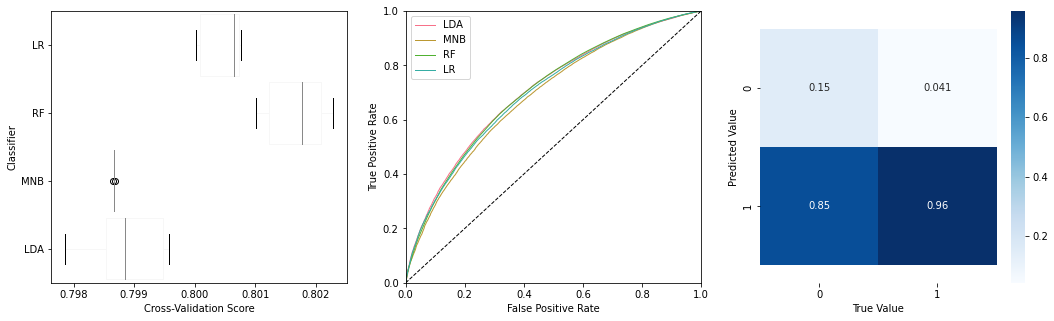

In [119]:
# Plot the box plot for cross validation scores
# Plot the ROC curve for all tested models
# Plot the confusion matrix for the logistic regression
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

ax = pd.DataFrame(unbalset).boxplot(widths=(0.9,0.9,0.9,0.9), grid=False, vert=False, ax=axes[0])
ax.set_ylabel('Classifier')
ax.set_xlabel('Cross-Validation Score')

for i in range(0, len(tp_unbalset)):
    axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)

axes[1].plot([0, 1], [0, 1], '--k', lw=1)
axes[1].legend(models.keys())
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)

cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2])
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

In [120]:
# TP and FP from the testing set
fp, tp, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1]) 

Text(0, 0.5, 'True Positive & False Positive Rates')

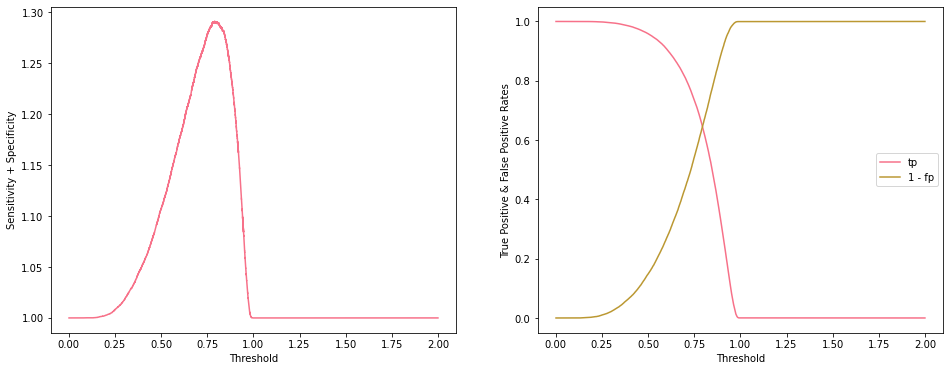

In [121]:
# Plotting the threshold for TP and FP rates 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

ax[0].plot(threshold, tp + (1 - fp))
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Sensitivity + Specificity')

ax[1].plot(threshold, tp, label="tp")
ax[1].plot(threshold, 1 - fp, label="1 - fp")
ax[1].legend()
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('True Positive & False Positive Rates')

In [122]:
# Identify the optimal threshold for the model
function = tp + (1 - fp)
index = np.argmax(function)

optimal_threshold = threshold[np.argmax(function)]
print('optimal threshold:', optimal_threshold)

optimal threshold: 0.7909484441507788


(0.0, 2.0, 2.0, 0.0)

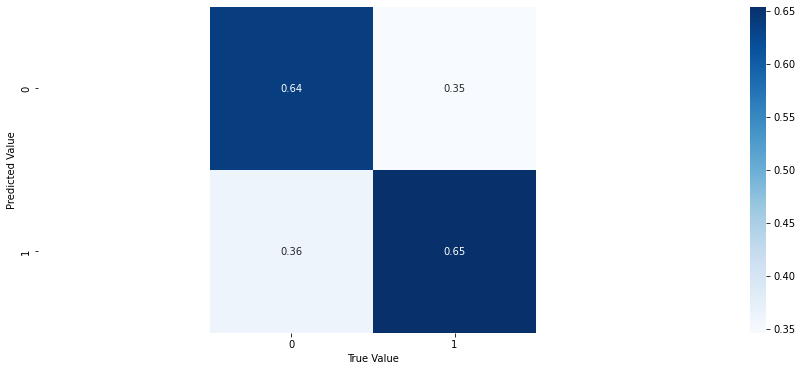

In [123]:
# Plotting the confusion matrix for the optimal threshold
predict = model.predict_proba(X_test)[:,1]
predict = np.where(predict >= optimal_threshold, 1, 0)

fig, axes = plt.subplots(figsize=(15,6))

cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

In [125]:
# Resampling by choosing equal amount of 1's
y_default = traindata[traindata['loan_status_numerical'] == 0]
n_paid = traindata[traindata['loan_status_numerical'] == 1].sample(n=len(y_default), random_state=17) 

# Creating a new dataframe for balanced set
data = y_default.append(n_paid) 

# Creating the independent and dependent array
X_balance = data.drop('loan_status_numerical', axis=1)
y_balance = data['loan_status_numerical']

C:\Users\cronus_win11\AppData\Local\Temp\ipykernel_14256\4030532992.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [126]:
# Check the length of each sample
print(len(n_paid))
print(len(y_default))

50454
50454


In [127]:
# Scaling the dataframe once again with the new balanced set
numerical = X_balance.columns[(X_balance.dtypes == 'float64') | (X_balance.dtypes == 'int64')].tolist()
X_balance[numerical] = sc.fit_transform(X_balance[numerical])



In [158]:
# Running the dataset through each iteration of the model once again
models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'RF': RandomForestClassifier(n_estimators=100),
          'LR': LogisticRegression(C=1, max_iter = 1000)}

balset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_balance - X_balance.min() + 1,
                                    y_balance, scoring='roc_auc', cv=3)
    balset[i] = scores
    print(i, scores, np.mean(scores))

LDA [0.70474764 0.70664808 0.70186153] 0.7044190822489366
MNB [0.68534313 0.67801553 0.68219125] 0.681849972425192
RF [0.71370639 0.70946879 0.7063424 ] 0.7098391921839647
LR [0.70894239 0.70699179 0.70575894] 0.7072310428091382


In [129]:
# Fitting the model to the balanced data
model = LogisticRegression(C=100, max_iter = 1000)
model.fit(X_balance, y_balance)
predict = model.predict(X_test)

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.29      0.69      0.41     21624
           1       0.88      0.58      0.70     85781

    accuracy                           0.60    107405
   macro avg       0.59      0.63      0.56    107405
weighted avg       0.76      0.60      0.64    107405



(0.0, 2.0, 2.0, 0.0)

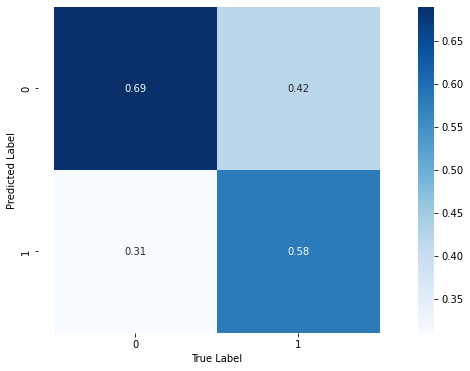

In [131]:
# Plotting the confusion matrix for the logistic regression model for the testing data
predict = model.predict(X_test)
fig, axes = plt.subplots(figsize=(8,6))
cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.axis('equal')

In [132]:
print(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

0.6864202092326215


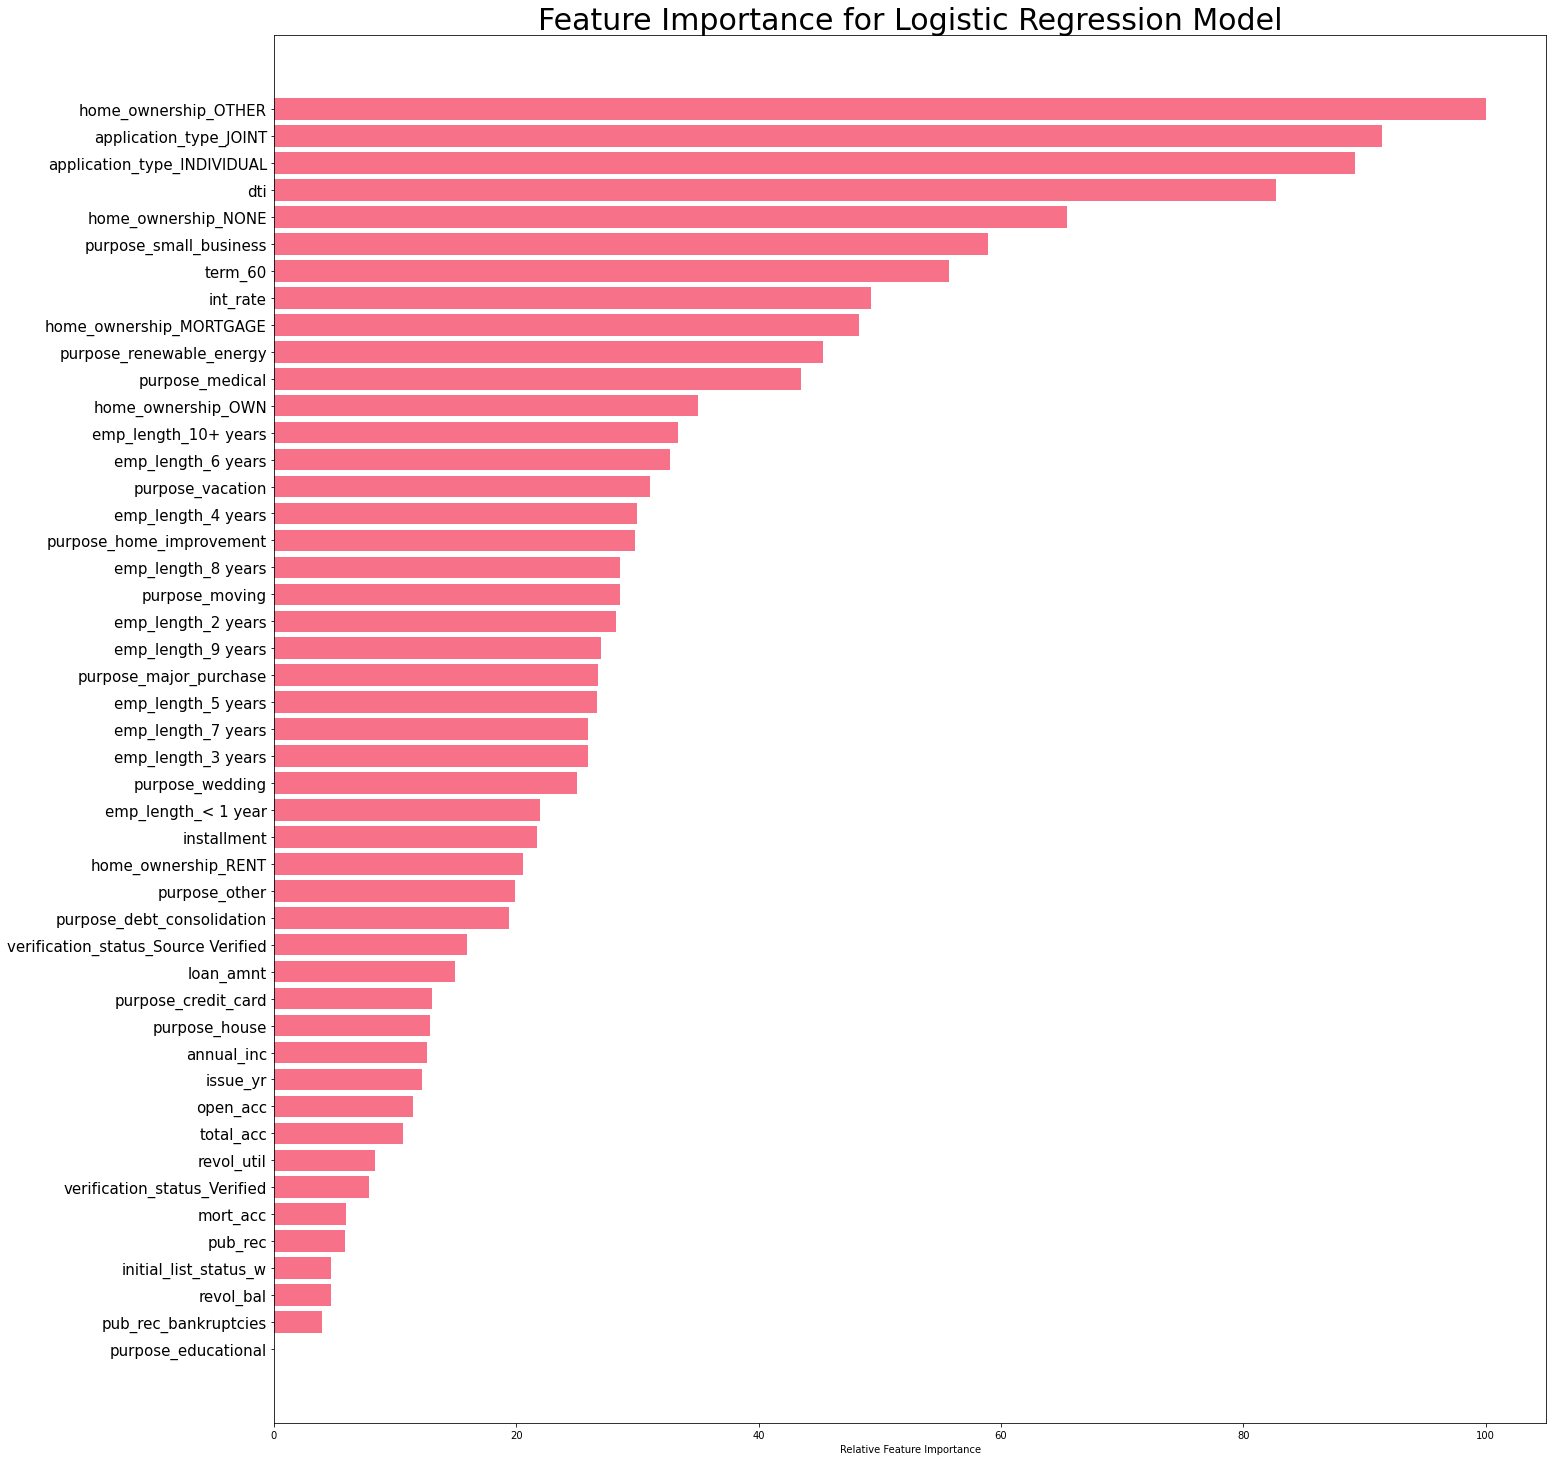

In [133]:
# Plotting the Feature Importance for the LogReg model
feature_importance = abs(model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(20,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_test.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()
plt.title("Feature Importance for Logistic Regression Model", fontsize=30)
plt.yticks(fontsize=15)
plt.show()

In [138]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

X = X_test.iloc[:, 1:]

forest = RandomForestClassifier(n_estimators = 100)

fig = plt.figure(figsize=(15, 10))
plot_tree(forest.estimators_[0], 
          feature_names=X.columns,
          class_names=df_model['loan_status_numerical'].unique(), 
          filled=True, rounded=True)

plt.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

<Figure size 1080x720 with 0 Axes>

In [147]:
X_test.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'issue_yr', 'term_60', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years',
       'emp_length_8 years', 'emp_length_9 years', 'emp_length_< 1 year',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_lis

[Text(0.5, 0.9166666666666666, 'int_rate <= 0.238\ngini = 0.322\nsamples = 107405\nvalue = [21624, 85781]'),
 Text(0.25, 0.75, 'int_rate <= -0.272\ngini = 0.228\nsamples = 64023\nvalue = [8389, 55634]'),
 Text(0.125, 0.5833333333333334, 'int_rate <= -1.048\ngini = 0.176\nsamples = 40609\nvalue = [3971, 36638]'),
 Text(0.0625, 0.4166666666666667, 'dti <= -0.034\ngini = 0.124\nsamples = 18019\nvalue = [1198, 16821]'),
 Text(0.03125, 0.25, 'annual_inc <= -0.613\ngini = 0.101\nsamples = 11371\nvalue = [604, 10767]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.212\nsamples = 563\nvalue = [68, 495]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.094\nsamples = 10808\nvalue = [536, 10272]'),
 Text(0.09375, 0.25, 'int_rate <= -1.488\ngini = 0.163\nsamples = 6648\nvalue = [594, 6054]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.122\nsamples = 2937\nvalue = [192, 2745]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.193\nsamples = 3711\nvalue = [402, 3309]'),
 Text(0.1875, 0.4166666

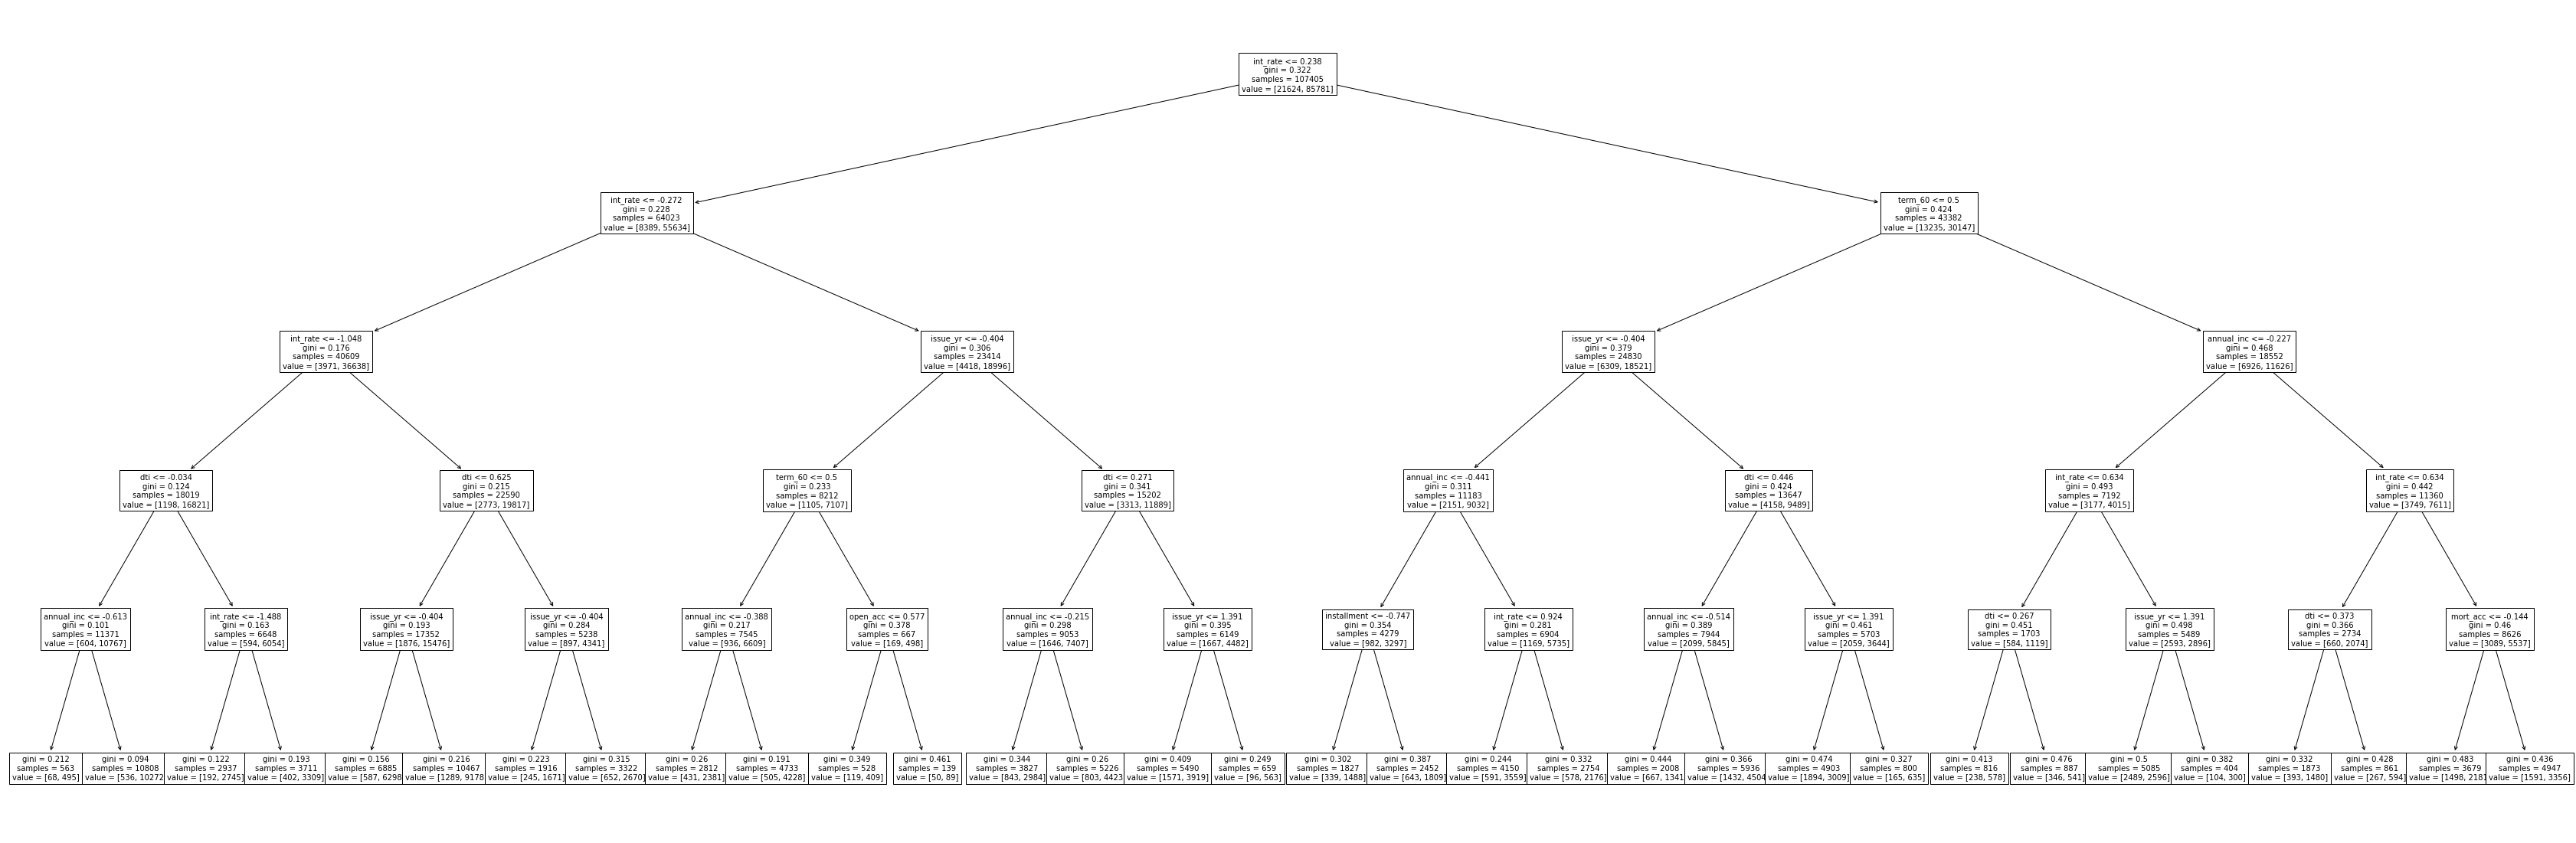

In [157]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 5)
clf = clf.fit(X_test, y_test)
fig = plt.figure(figsize=(60, 20))
tree.plot_tree(clf, feature_names = X_test.columns, fontsize = 10)